In [10]:
import pandas as pd
from IPython.core.pylabtools import figsize
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np

In [7]:
np.random.seed(42)

In [8]:
dane = np.random.normal(loc=70, scale=10, size=30)  # loc = średnia, scale - odchylenie

In [12]:
df = pd.DataFrame({"Wynik": dane})
df.head()

,Wynik
0,74.967142
1,68.617357
2,76.476885
3,85.230299
4,67.658466


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Histogram wyników')

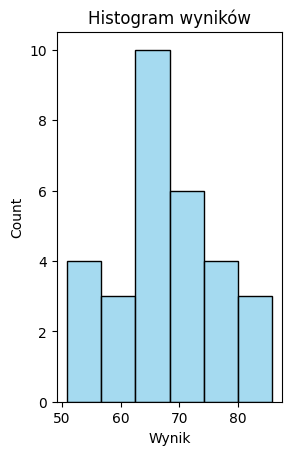

In [14]:
plt.subplot(1, 2, 1)
sns.histplot(df["Wynik"], kde=True, color="skyblue")
plt.title("Histogram wyników")

In [15]:
srednia = df['Wynik'].mean()
mediana = df['Wynik'].median()
dominanta = df['Wynik'].mode()[0]  # najczęściej występująca wartość

In [16]:
wariancja = df['Wynik'].var()
odch_stan = df['Wynik'].std()

In [17]:
rozstep = df['Wynik'].max() - df["Wynik"].min()

Text(0.5, 1.0, 'wykres pudełkowy')

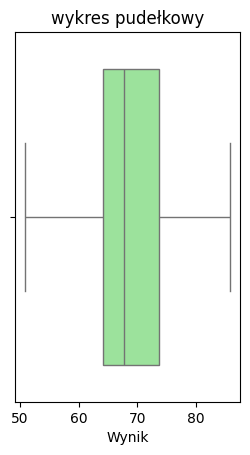

In [18]:
# wykres pudełkowy
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Wynik"], color="lightgreen")
plt.title("wykres pudełkowy")

-----

In [20]:
groupA = np.random.normal(70, 5, 100)
groupB = np.random.normal(65, 10, 100)

In [21]:
df = pd.DataFrame({"Grupa": ["A"] * 100 + ["B"] * 100, "Wynik": np.concatenate([groupA, groupB])})
df.head()

,Grupa,Wynik
0,A,66.348167
1,A,71.082293
2,A,70.227859
3,A,66.741998
4,A,80.719720


C:\Users\CSComarch\AppData\Local\Temp\ipykernel_2508\2745912955.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupa", y="Wynik", data=df, palette="pastel")


Text(0.5, 1.0, 'Porównanie')

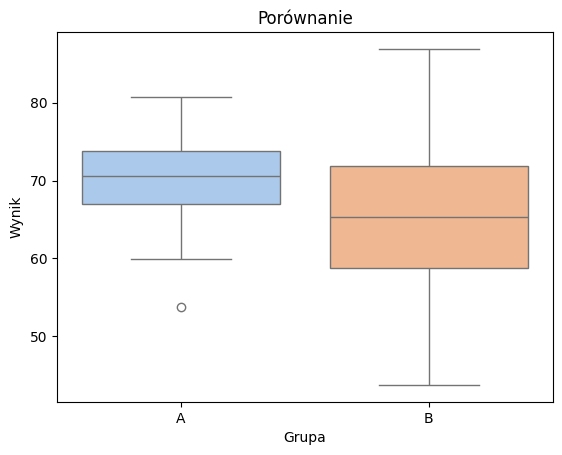

In [22]:
sns.boxplot(x="Grupa", y="Wynik", data=df, palette="pastel")
plt.title("Porównanie")

------

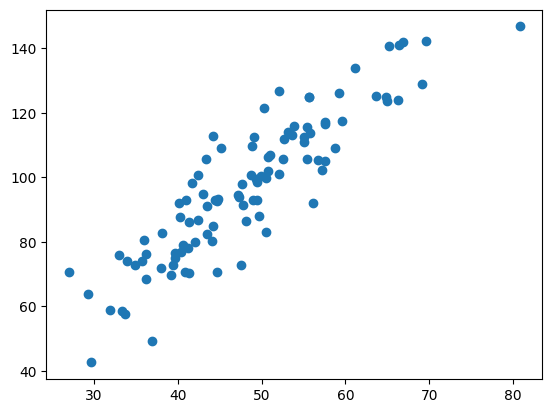

In [23]:
x = np.random.normal(50, 10, 100)
y = 2 * x + np.random.normal(0, 10, 100)

plt.scatter(x, y)

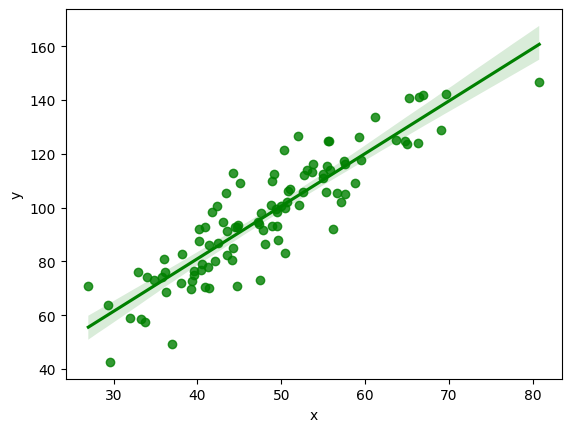

In [24]:
df = pd.DataFrame({"x": x, "y": y})

sns.regplot(x="x", y="y", data=df, color="green")
plt.show()

-----

In [25]:
np.random.seed(0)

In [26]:
x = np.random.normal(50, 8, 100)
x_out = np.concatenate([x, [200, 220]])

In [27]:
s = pd.Series(x)

In [28]:
s.head()

0    64.112419
1    53.201258
2    57.829904
3    67.927146
4    64.940464
dtype: float64

In [29]:
q1, q3 = s.quantile([0.25, 0.75])

In [30]:
q1

44.84914654236232

In [32]:
q3

55.896618823359205

# SciPy
algebra, interpolacja, statystyka

In [33]:
!pip install scipy

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   -- ------------------------------------- 2.6/39.4 MB 13.9 MB/s eta 0:00:03
   ------------------- -------------------- 19.1/39.4 MB 50.1 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.4 MB 69.9 MB/s eta 0:00:01
   ---------------------------------------- 39.4/39.4 MB 54.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


kurtoza - miara spiczastości

In [35]:
from scipy.stats import skew, kurtosis

In [36]:
for name, data in [("normalny", x), ("z_otlierami", x_out)]:
    print(name, " skew:", round(skew(data), 3), " kurt:", round(kurtosis(data), 3))

normalny  skew: 0.005  kurt: -0.378
z_otlierami  skew: 5.761  kurt: 36.082


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize, stats, spatial, fft, signal, linalg, ndimage, cluster

# Obliczenie całki oznaczonej

In [38]:
res, err = integrate.quad(lambda x: x ** 2, 0, 2)
print("Wynik calkowania x^2", res, "Bład:", err)

Wynik calkowania x^2 2.666666666666667 Bład: 2.960594732333751e-14


# Znajdowanie minimum funkcji kwadratowej f(x) = (x-3) ^2

In [39]:
res = optimize.minimize(lambda x: (x - 3) ** 2, x0=0)
print("Minimum:", res)

Minimum:   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388963550532293e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-1.697e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


In [40]:
res.x

array([2.99999998])

# Test Shapiro-Wilka

In [41]:
data = stats.norm.rvs(size=500)

In [42]:
stat, p = stats.shapiro(data)
print("Shapiro-Wilk:", stat, "p-value", p)

Shapiro-Wilk: 0.9979246699038464 p-value 0.8061621677584668


bliskie 1, p > 0.05 mozna uznac, ze rozkład jest normalny

Text(0, 0.5, 'Częśtość')

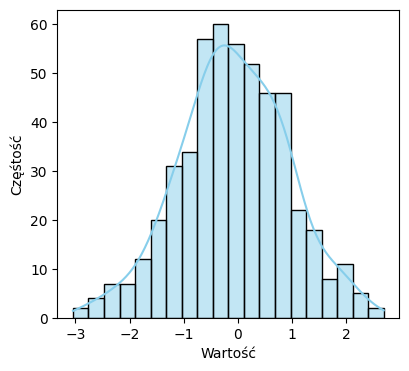

In [43]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(data, bins=20, kde=True, color="skyblue")
plt.xlabel("Wartość")
plt.ylabel("Częśtość")

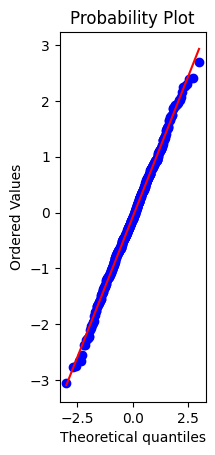

In [44]:
plt.subplot(1, 3, 3)
stats.probplot(data, dist="norm", plot=plt)
plt.show()

# Odległość euklidesowa

In [45]:
from scipy.spatial.distance import euclidean

In [46]:
print("Odległość:", euclidean([1, 2], [4, 6]))

Odległość: 5.0


In [47]:
print(type(euclidean([1, 2], [4, 6])))

<class 'numpy.float64'>


# FFT Szybka Transformata Fourira

In [51]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
yf = fft.fft(y)
print("FFT:", yf[:5])

FFT: [ 2.77555756e-16 -0.j          1.56237833e+00-49.71568464j
 -4.25850363e-02 +0.67686977j -3.57787605e-02 +0.37849975j
 -3.38833476e-02 +0.26821431j]


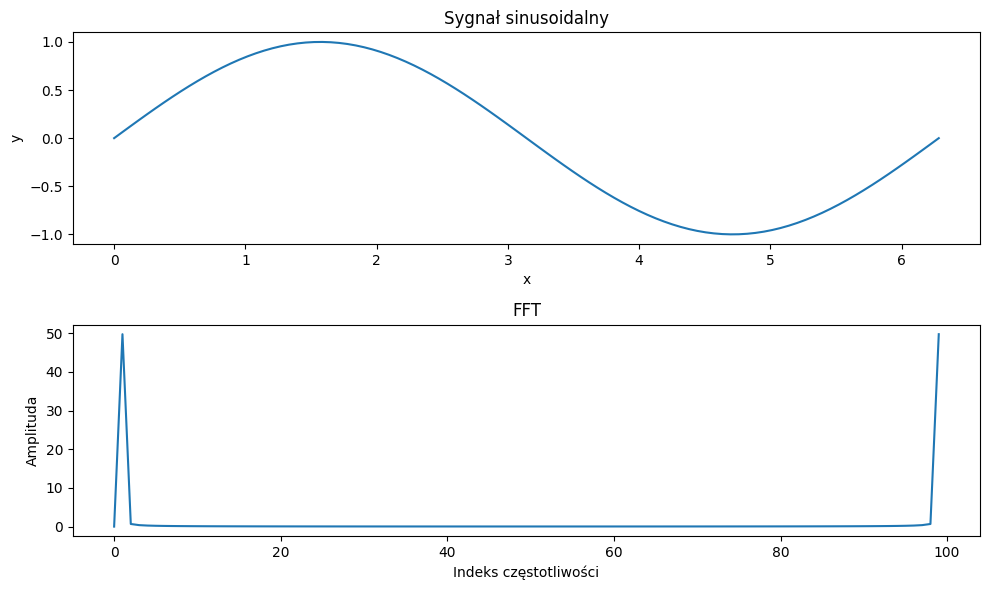

In [54]:
xf = np.arange(len(yf))

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(x,y)
axs[0].set_title("Sygnał sinusoidalny")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].plot(xf,np.abs(yf))
axs[1].set_title("FFT")
axs[1].set_xlabel("Indeks częstotliwości")
axs[1].set_ylabel("Amplituda")

plt.tight_layout()
plt.show()